In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df_amazon = pd.read_csv('data/AMZN.csv', index_col='Date', parse_dates=True)
df_amazon.index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

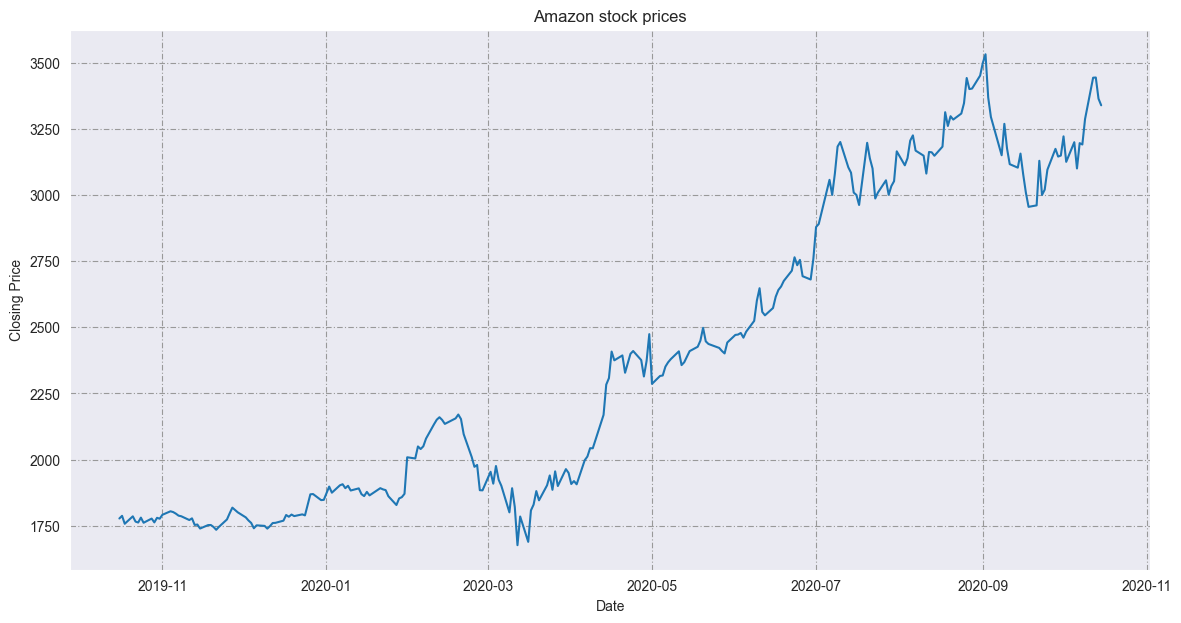

In [3]:
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.00, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing Price')
axes_1.set_title('Amazon stock prices')
axes_1.plot(df_amazon.index, df_amazon['Close'], label='closing price')
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

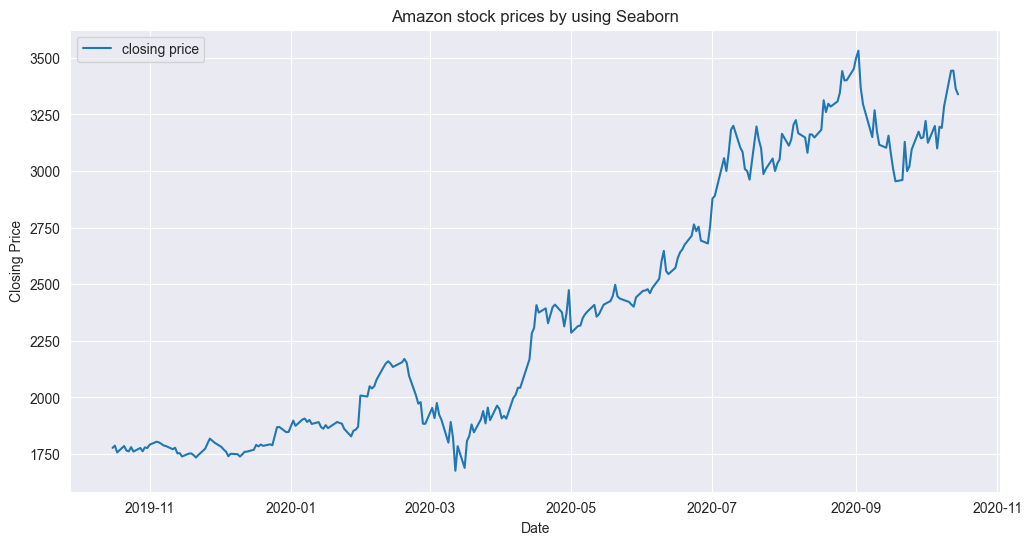

In [4]:
fig_2 = plt.figure(figsize=(12,6), dpi=100)
axes_2 = sns.lineplot(data=df_amazon, x=df_amazon.index, y='Close', label='closing price')
axes_2.set(xlabel ='Date', ylabel='Closing Price')
axes_2.set_title('Amazon stock prices by using Seaborn')
axes_2.legend(loc='upper left')
sns.set_style('whitegrid', {'axes_2.facecolor':'0.9'})
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

In [5]:
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=df_amazon.index, y=df_amazon['Close'], mode='lines', name='Amazon stock prices'))
fig_3.update_layout(
    xaxis = dict(showgrid=True,showline=True,showticklabels=True),
    yaxis = dict(showgrid=True,showline=True,showticklabels=True),
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='Closing price',
    title='Amazon stock prices'
)

### Matplotlib Finance

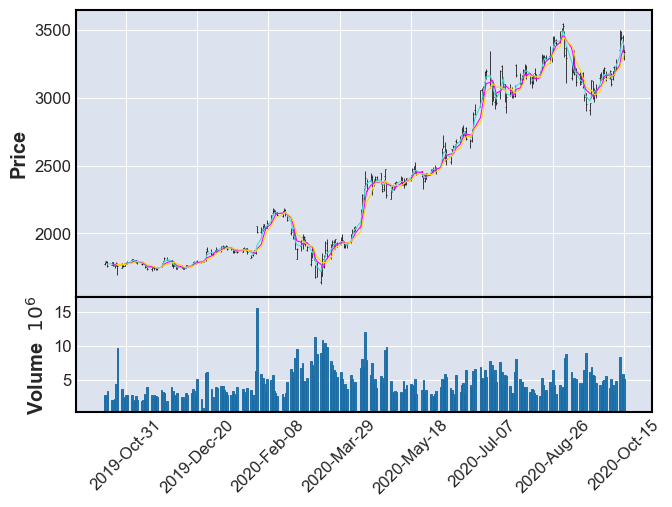

In [6]:
mpf.plot(df_amazon, type='ohlc', mav=(3,5,7), volume=True, show_nontrading=True)

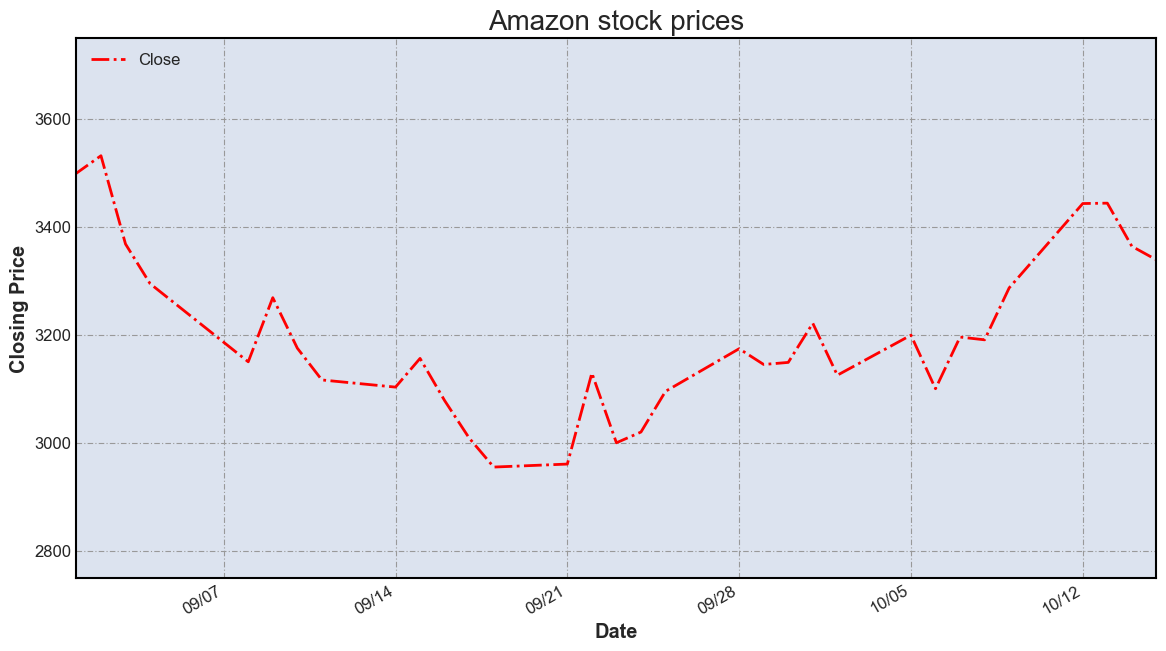

In [7]:
#plotting time periods & styling

fig_1 = plt.figure(figsize=(12,8), dpi=100)
axes_1 = fig_1.add_axes([0.00, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing Price')
axes_1.set_title('Amazon stock prices', fontsize=20)

df_amazon['Close'].plot(figsize=(12,6), xlim=['2020-09-01', '2020-10-15'], grid=True, 
                        ylim=[2750, 3750],
                        color='red',
                        lw=2,
                        ls='-.')
axes_1.legend(loc='upper left')
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

axes_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
axes_1.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))